λ (Price impact): 0.032
β (Insider intensity): 15.811
Mean squared error between price and value: 6.5760


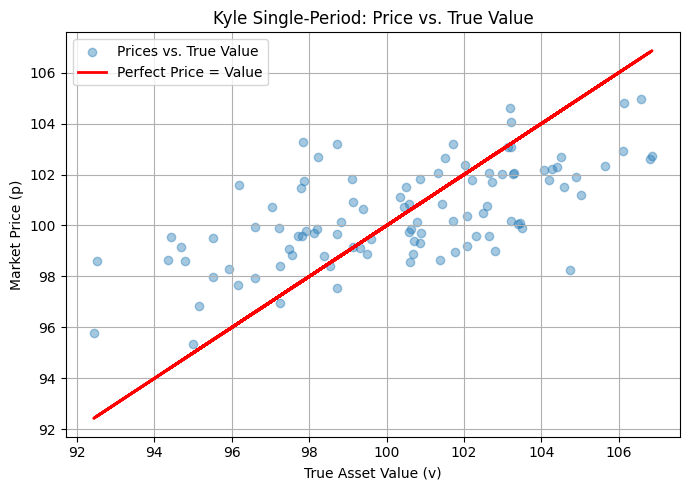

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# initial parameters
Sigma0 = 10        # Prior std. dev of v
sigma_u = 50       # Std. dev. of noise trader demand
p0 = 100            # Prior mean of asset value
n = 100            # Number of simulated trades

# Kyle equilibrium
lambda_kyle = np.sqrt(Sigma0) / (2 * sigma_u)
beta_kyle = sigma_u / np.sqrt(Sigma0)

# Simulating true asset values and noise
v = np.random.normal(loc=p0, scale=np.sqrt(Sigma0), size=n)
u = np.random.normal(loc=0, scale=sigma_u, size=n)

# Insider order
x = beta_kyle * (v - p0)

# Total order flow
y = x + u

# Market price
p = p0 + lambda_kyle * y

# === Analysis ===
# Price error
error = p - v
mse = np.mean(error**2)

print(f"λ (Price impact): {lambda_kyle:.3f}")
print(f"β (Insider intensity): {beta_kyle:.3f}")
print(f"Mean squared error between price and value: {mse:.4f}")

# === Plot ===

plt.figure(figsize=(7, 5))
plt.scatter(v, p, alpha=0.4, label="Prices vs. True Value")
plt.plot(v, v, color='red', label="Perfect Price = Value", linewidth=2)
plt.xlabel("True Asset Value (v)")
plt.ylabel("Market Price (p)")
plt.title("Kyle Single-Period: Price vs. True Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


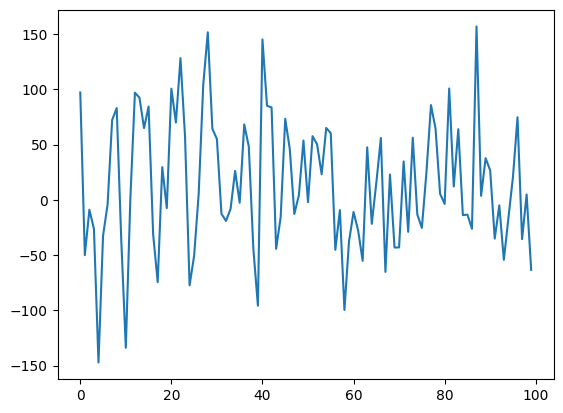

In [11]:
# plot of simulated y (total order flow)
plt.plot(y)

Kyle Model Simulation Results:
   Total Order Flow (y)   Price (p)
0             97.155052  103.072313
1            -50.036292   98.417714
2             -8.970931   99.716314
3            -26.181099   99.172081
4           -147.145508   95.346850


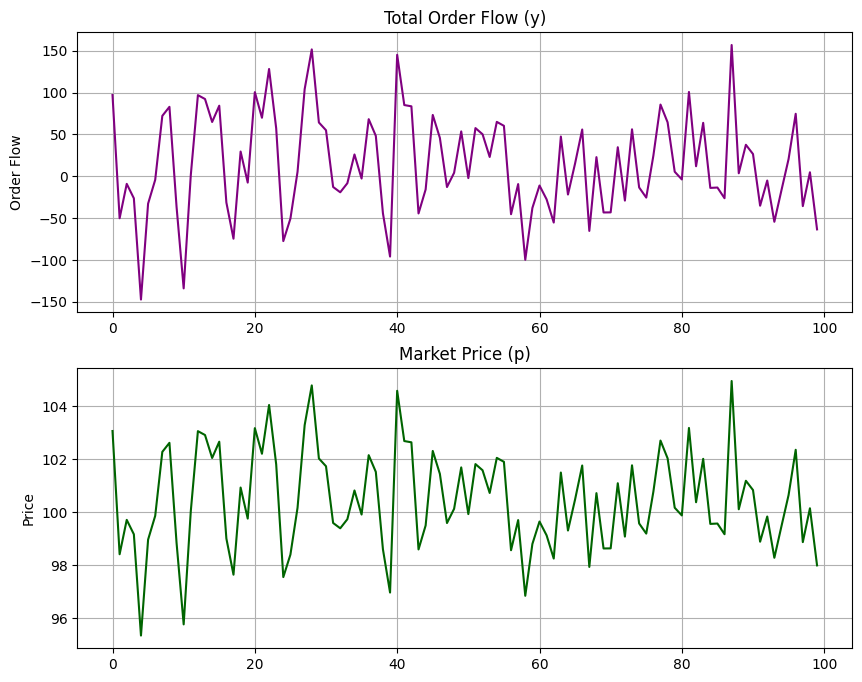

In [12]:
# price and total order flow
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].plot(y, label="Total Order Flow (y)", color='purple')
axes[0].set_title("Total Order Flow (y)")
axes[0].set_ylabel("Order Flow")
axes[0].grid(True)

axes[1].plot(p, label="Market Price (p)", color='darkgreen')
axes[1].set_title("Market Price (p)")
axes[1].set_ylabel("Price")
axes[1].grid(True)



results_kyle = pd.DataFrame({
    'Total Order Flow (y)': y,
    'Price (p)': p
})
print("Kyle Model Simulation Results:")
print(results_kyle.head())

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/var/folders/xx/h26qxyld2fb7n13d0cvby8ww0000gn/T/ipykernel_77535/2776948152.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Kyle Model: Price vs. Order Flow ($\lambda = {lambda_kyle}$)')
/var/folders/xx/h26qxyld2fb7n13d0cvby8ww0000gn/T/ipykernel_77535/2776948152.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(omega_range, price_line, color='green', label='Pricing Rule: p = $\mu + \lambda y$')


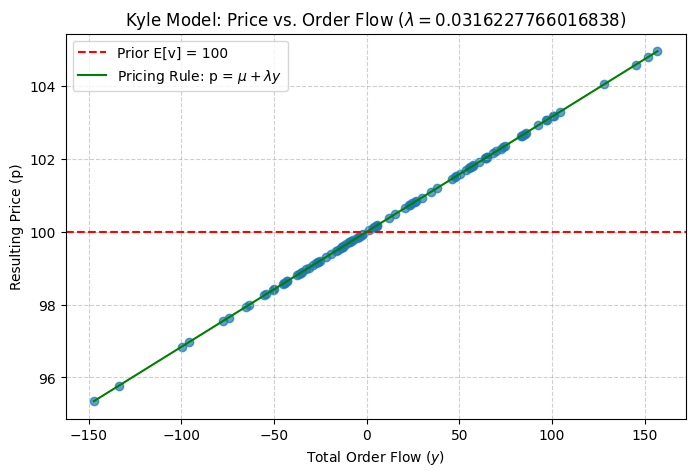

In [13]:
# price and total order flow
plt.figure(figsize=(8, 5))
plt.scatter(results_kyle['Total Order Flow (y)'], results_kyle['Price (p)'], alpha=0.7)
plt.axhline(p0, color='red', linestyle='--', label=f'Prior E[v] = {p0}')
plt.xlabel('Total Order Flow ($y$)')
plt.ylabel('Resulting Price (p)')
plt.title(f'Kyle Model: Price vs. Order Flow ($\lambda = {lambda_kyle}$)')
# Plot the pricing rule line
omega_range = np.linspace(results_kyle['Total Order Flow (y)'].min(), results_kyle['Total Order Flow (y)'].max(), 50)
price_line = p0 + lambda_kyle * omega_range
plt.plot(omega_range, price_line, color='green', label='Pricing Rule: p = $\mu + \lambda y$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

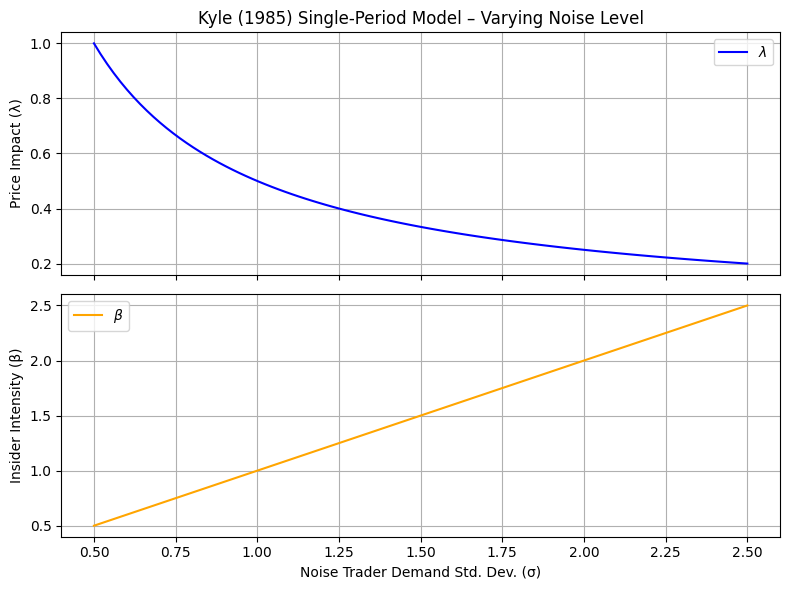

In [14]:
### Evolution of lambda and beta with noise level (single-period)
### Fixed Σ₀ = 1

Sigma0 = 1.0
sigma_u_values = np.linspace(0.5, 2.5, 100)

# Compute lambda and beta for each sigma_u
lambda_vals = np.sqrt(Sigma0) / (2 * sigma_u_values)
beta_vals = sigma_u_values / np.sqrt(Sigma0)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# λ vs σ
axs[0].plot(sigma_u_values, lambda_vals, color='blue', label=r'$\lambda$')
axs[0].set_ylabel('Price Impact (λ)')
axs[0].grid(True)
axs[0].legend()
axs[0].set_title('Kyle (1985) Single-Period Model – Varying Noise Level')

# β vs σ
axs[1].plot(sigma_u_values, beta_vals, color='orange', label=r'$\beta$')
axs[1].set_xlabel('Noise Trader Demand Std. Dev. (σ)')
axs[1].set_ylabel('Insider Intensity (β)')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


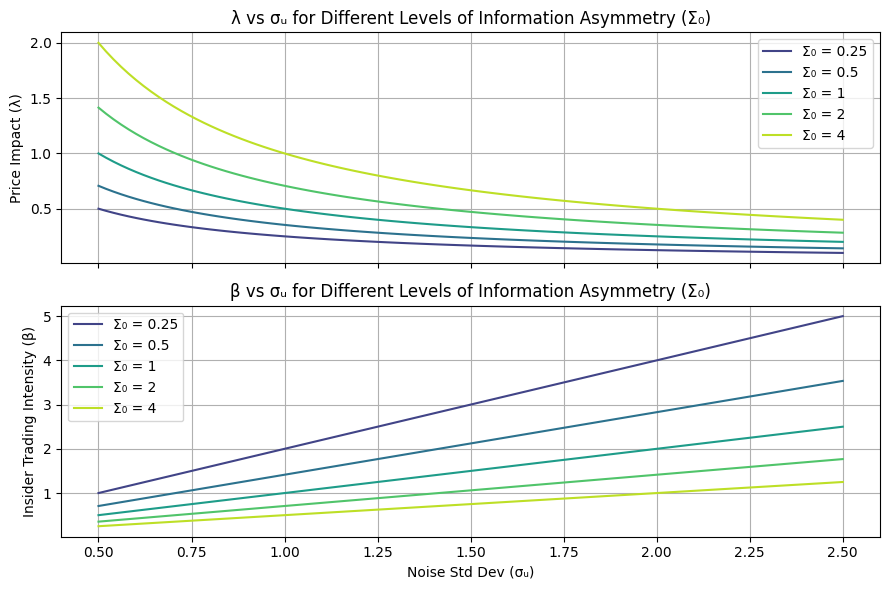

In [15]:
### Varying Σ₀ and σ_u
# Range of σ_u values (noise levels)
sigma_u_vals = np.linspace(0.5, 2.5, 100)

# Varying Σ₀ (info asymmetry levels)
Sigma0_vals = [0.25, 0.5, 1, 2, 4]
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(Sigma0_vals)))

# subplots
fig, axs = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# λ plots
for i, Sigma0 in enumerate(Sigma0_vals):
    lambda_vals = np.sqrt(Sigma0) / (2 * sigma_u_vals)
    axs[0].plot(sigma_u_vals, lambda_vals, label=f"Σ₀ = {Sigma0}", color=colors[i])

axs[0].set_ylabel("Price Impact (λ)")
axs[0].set_title("λ vs σᵤ for Different Levels of Information Asymmetry (Σ₀)")
axs[0].legend()
axs[0].grid(True)

# β plots
for i, Sigma0 in enumerate(Sigma0_vals):
    beta_vals = sigma_u_vals / np.sqrt(Sigma0)
    axs[1].plot(sigma_u_vals, beta_vals, label=f"Σ₀ = {Sigma0}", color=colors[i])

axs[1].set_ylabel("Insider Trading Intensity (β)")
axs[1].set_xlabel("Noise Std Dev (σᵤ)")
axs[1].set_title("β vs σᵤ for Different Levels of Information Asymmetry (Σ₀)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


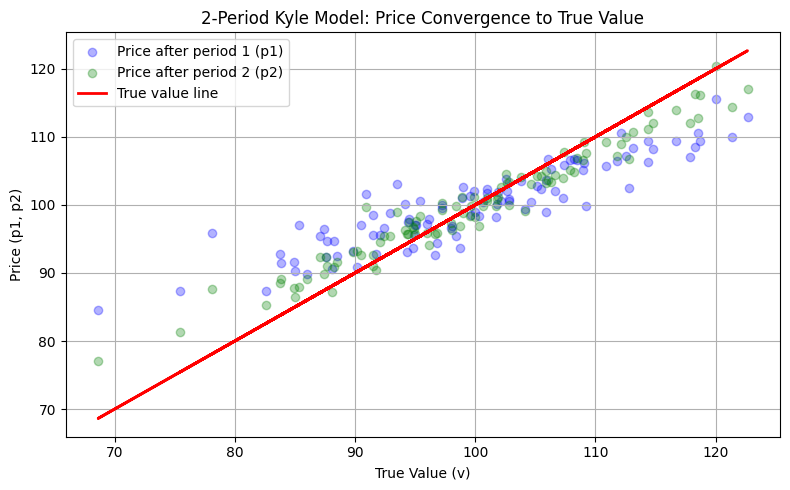

            Stage  MSE (p - v)  Price impact λ  Insider intensity β
0  After period 1    33.139749        0.054772             9.128709
1  After period 2     9.948342        0.027386            18.257419


In [16]:
### 2-Period Kyle Model
# Parameters
Sigma0 = 10           # Prior std dev of v
sigma_u = 50          # Std dev of noise trader demand
p0 = 100.0               # Prior mean of asset value
n = 100               # Number of simulated agents (trials)

# Equilibrium parameters
beta_0 = sigma_u / np.sqrt(3 * Sigma0)
lambda_0 = np.sqrt(3 * Sigma0) / (2 * sigma_u)

Sigma1 = (3 / 4) * Sigma0
beta_1 = sigma_u / np.sqrt(Sigma1)  # Equivalent to 2 * sigma_u / sqrt(3 * Sigma0)
lambda_1 = np.sqrt(Sigma1) / (2 * sigma_u)

# Simulate true asset values and noise
v = np.random.normal(loc=p0, scale=Sigma0, size=n)
u0 = np.random.normal(loc=0, scale=sigma_u, size=n)
u1 = np.random.normal(loc=0, scale=sigma_u, size=n)

# Period 0
x0 = beta_0 * (v - p0)
y0 = x0 + u0
p1 = p0 + lambda_0 * y0

# Period 1
x1 = beta_1 * (v - p1)
y1 = x1 + u1
p2 = p1 + lambda_1 * y1

# Evaluate errors
errors_p1 = p1 - v
errors_p2 = p2 - v
mse_p1 = np.mean(errors_p1**2)
mse_p2 = np.mean(errors_p2**2)

# how well prices reflect v after period 1 and period 2
plt.figure(figsize=(8, 5))
plt.scatter(v, p1, alpha=0.3, label="Price after period 1 (p1)", color='blue')
plt.scatter(v, p2, alpha=0.3, label="Price after period 2 (p2)", color='green')
plt.plot(v, v, color='red', linewidth=2, label="True value line")
plt.xlabel("True Value (v)")
plt.ylabel("Price (p1, p2)")
plt.title("2-Period Kyle Model: Price Convergence to True Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# summary table
summary_df = pd.DataFrame({
    "Stage": ["After period 1", "After period 2"],
    "MSE (p - v)": [mse_p1, mse_p2],
    "Price impact λ": [lambda_0, lambda_1],
    "Insider intensity β": [beta_0, beta_1]
})

print(summary_df)


In [20]:
### Adjustment function
y = []
def price_adj_function(y, lambda_kyle):
    return lambda_kyle * np.sign(y) * np.log1p(abs(y))  # logarithmic adjustment

# not sensitive to large orders -> ignores order size noise 
# avoids large price swings



In [33]:
v = np.random.normal(loc=p0, scale= Sigma0)
mm_quotes = [(99, 101)]
y = []
iterations = 50
for i in range(iterations):
    midprice = (mm_quotes[-1][0] + mm_quotes[-1][1])/2
    uninformed_trader_of = np.random.normal(0, 1)
    informed_trader_of = (v - midprice)
    y_total = uninformed_trader_of + informed_trader_of

    last_bid = mm_quotes[-1][0]
    last_ask = mm_quotes[-1][1]
    price_adjustment = price_adj_function(y_total, lambda_kyle)

    new_bid, new_ask = last_bid + price_adjustment, last_ask + price_adjustment
    y.append(y_total)
    mm_quotes.append((new_bid, new_ask))

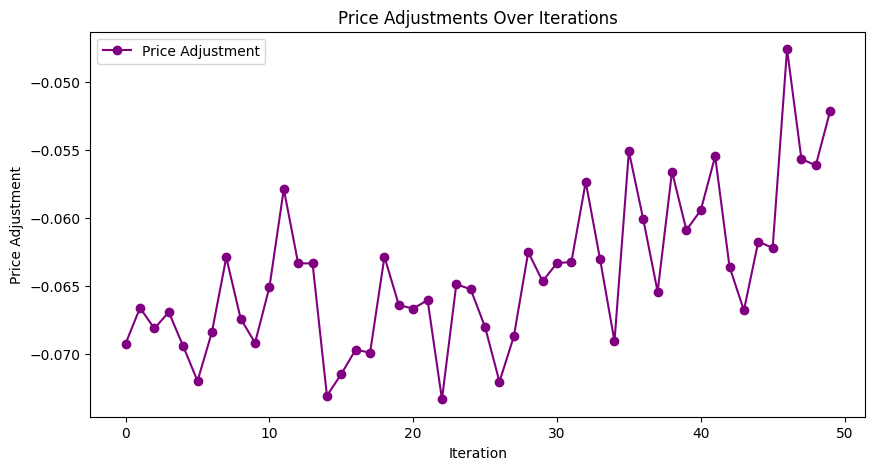

In [35]:
# price adjustments at each step
price_adjustments = [mm_quotes[i+1][0] - mm_quotes[i][0] for i in range(len(mm_quotes)-1)]

# Plot price adjustments over iterations
plt.figure(figsize=(10, 5))
plt.plot(price_adjustments, marker='o', linestyle='-', color='purple', label="Price Adjustment")
plt.xlabel("Iteration")
plt.ylabel("Price Adjustment")
plt.title("Price Adjustments Over Iterations")
plt.legend()
plt.show()
